In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create the dataset
data_str = """red	green	blue	class
202	39	34	merah
145	68	47	merah
208	36	33	merah
182	52	31	merah
175	70	58	merah
203	39	34	merah
197	40	36	merah
187	46	37	merah
112	86	255	merah
147	67	47	merah
96	112	47	hijau
153	82	52	hijau
136	87	56	hijau
142	85	55	hijau
101	93	66	hijau
69	114	77	hijau
97	112	46	hijau
67	105	85	hijau
105	96	56	hijau
92	108	69	hijau
128	84	63	biru
68	102	88	biru
59	99	104	biru
84	82	100	biru
113	87	70	biru
118	88	66	biru
118	86	62	biru
138	84	74	biru
122	89	74	biru
122	84	69	biru
137	131	125	tidak berwarna
132	132	143	tidak berwarna
159	143	147	tidak berwarna
173	138	128	tidak berwarna
171	135	124	tidak berwarna
171	135	123	tidak berwarna
168	132	119	tidak berwarna
159	120	103	tidak berwarna
162	124	109	tidak berwarna
161	124	108	tidak berwarna"""

In [11]:
import pandas as pd
from io import StringIO
df = pd.read_csv(StringIO(data_str), sep='\t')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nClasses: {df['class'].unique()}")
print(f"\nClass distribution:\n{df['class'].value_counts()}")

Dataset loaded successfully!
Dataset shape: (40, 4)

Classes: ['merah' 'hijau' 'biru' 'tidak berwarna']

Class distribution:
class
merah             10
hijau             10
biru              10
tidak berwarna    10
Name: count, dtype: int64


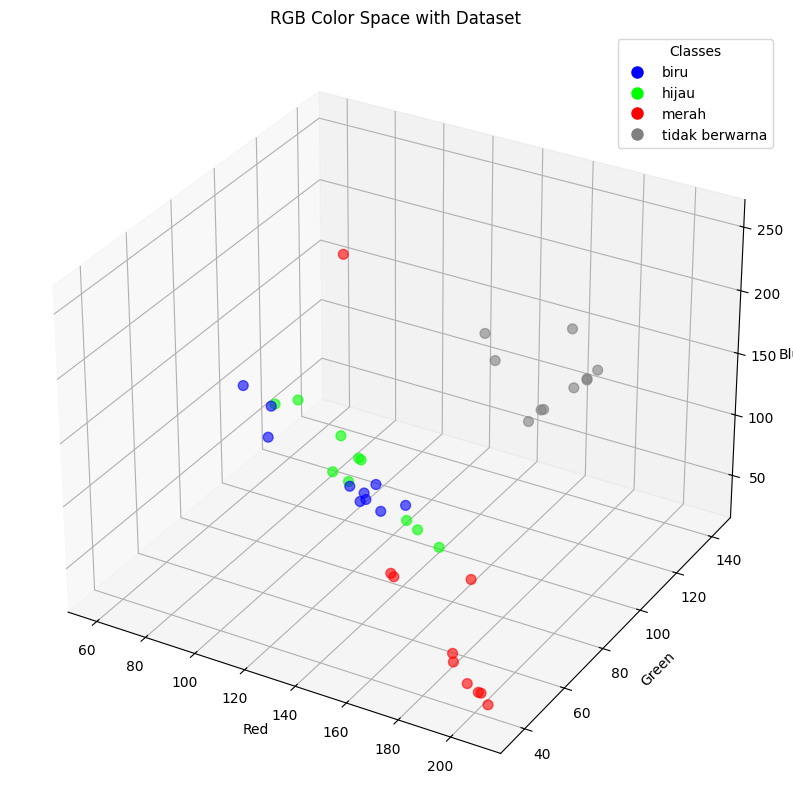

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Drop rows where 'class' is NaN to avoid TypeError with matplotlib categories
df_cleaned = df.dropna(subset=['class'])

# Get unique classes in the order they are encoded by pandas Categorical from cleaned data
category_names = df_cleaned['class'].astype('category').cat.categories
class_codes_for_cmap = df_cleaned['class'].astype('category').cat.codes

# Create a base colormap (e.g., 'viridis') with enough colors for all categories
base_cmap = plt.get_cmap('viridis', len(category_names))
colors_array = base_cmap(np.linspace(0, 1, len(category_names)))

# Find the index of 'tidak berwarna' in the category names and set its color to grey
idx_tidak_berwarna = np.where(category_names == 'tidak berwarna')[0][0]
colors_array[idx_tidak_berwarna] = [0.5, 0.5, 0.5, 1]  # RGBA for grey

# Find the index of 'biru' in the category names and set its color to blue
idx_biru = np.where(category_names == 'biru')[0][0]
colors_array[idx_biru] = [0, 0, 1, 1]  # RGBA for blue

# Find the index of 'hijau' in the category names and set its color to green
idx_hijau = np.where(category_names == 'hijau')[0][0]
colors_array[idx_hijau] = [0, 1, 0, 1]  # RGBA for green

# Find the index of 'merah' in the category names and set its color to red
idx_merah = np.where(category_names == 'merah')[0][0]
colors_array[idx_merah] = [1, 0, 0, 1]  # RGBA for red

# Create a new ListedColormap from the modified colors array
custom_cmap = ListedColormap(colors_array)

# Plot the entire dataset with the custom colormap, using df_cleaned
scatter = ax.scatter(df_cleaned['red'], df_cleaned['green'], df_cleaned['blue'],
                     c=class_codes_for_cmap, cmap=custom_cmap, s=50, alpha=0.6)

# Add labels and title
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('RGB Color Space with Dataset')

# Create a custom legend with actual class names and their custom colors
legend_handles = []
for i, cls_name in enumerate(category_names):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=cls_name,
                                     markerfacecolor=custom_cmap(i), markersize=10))

ax.legend(handles=legend_handles, title="Classes")

plt.show()

In [13]:
# Prepare features and target
X = df[['red', 'green', 'blue']].values
y = df['class'].values

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Optional: Feature scaling (K-NN can benefit from it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: 28
Test set size: 12


In [15]:
# Find optimal k value
k_range = range(1, 21)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

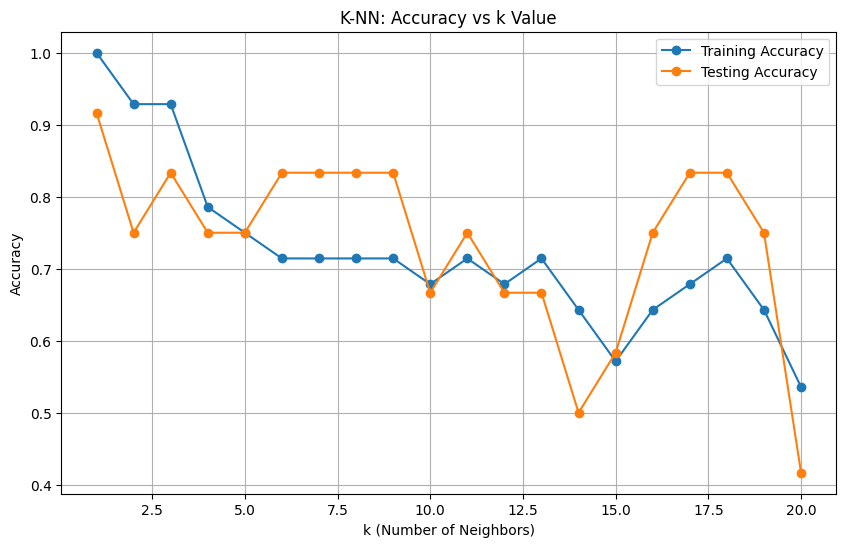

In [16]:
# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Testing Accuracy', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('K-NN: Accuracy vs k Value')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Find best k
best_k = k_range[np.argmax(test_scores)]
print(f"\nBest k value: {best_k}")
print(f"Best test accuracy: {max(test_scores):.4f}")


Best k value: 1
Best test accuracy: 0.9167


In [18]:
# Train final model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
# Make predictions
y_pred = knn_best.predict(X_test_scaled)

In [20]:
# Evaluate the model
print(f"\n{'='*50}")
print("FINAL MODEL EVALUATION")
print(f"{'='*50}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


FINAL MODEL EVALUATION
Accuracy: 0.9167

Classification Report:
                precision    recall  f1-score   support

          biru       1.00      1.00      1.00         3
         hijau       0.75      1.00      0.86         3
         merah       1.00      0.67      0.80         3
tidak berwarna       1.00      1.00      1.00         3

      accuracy                           0.92        12
     macro avg       0.94      0.92      0.91        12
  weighted avg       0.94      0.92      0.91        12



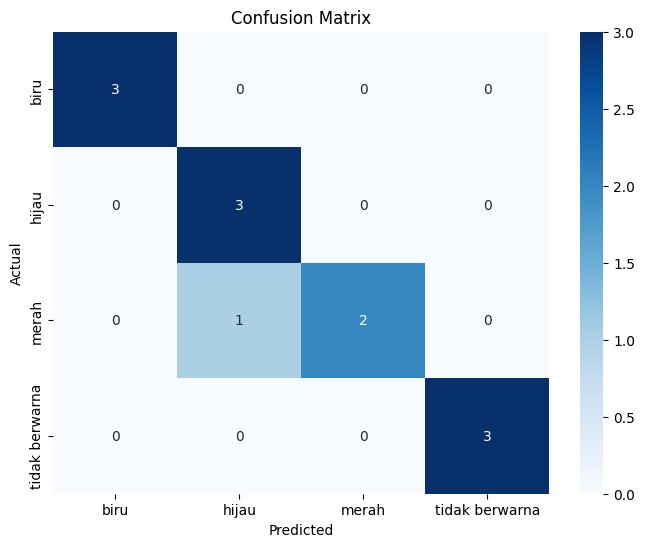

In [21]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Function to predict new RGB values
def predict_color(red, green, blue):
    """
    Predict color class for given RGB values
    """
    rgb_scaled = scaler.transform([[red, green, blue]])
    prediction = knn_best.predict(rgb_scaled)[0]
    probability = knn_best.predict_proba(rgb_scaled)[0]
    classes = knn_best.classes_

    print(f"\nInput RGB: ({red}, {green}, {blue})")
    print(f"Predicted class: {prediction}")
    print("Prediction probabilities:")
    for cls, prob in zip(classes, probability):
        print(f"  {cls}: {prob:.4f}")

    return prediction

In [23]:
# Example predictions
print(f"\n{'='*50}")
print("EXAMPLE PREDICTIONS")
print(f"{'='*50}")

# Test with some example values
examples = [
    (200, 50, 45),   # Should be merah (red)
    (80, 135, 75),   # Should be hijau (green)
    (120, 130, 150), # Should be biru (blue)
    (120, 120, 120)  # Should be tidak berwarna (neutral)
]

for r, g, b in examples:
    predict_color(r, g, b)
    print("-" * 30)


EXAMPLE PREDICTIONS

Input RGB: (200, 50, 45)
Predicted class: merah
Prediction probabilities:
  biru: 0.0000
  hijau: 0.0000
  merah: 1.0000
  tidak berwarna: 0.0000
------------------------------

Input RGB: (80, 135, 75)
Predicted class: hijau
Prediction probabilities:
  biru: 0.0000
  hijau: 1.0000
  merah: 0.0000
  tidak berwarna: 0.0000
------------------------------

Input RGB: (120, 130, 150)
Predicted class: tidak berwarna
Prediction probabilities:
  biru: 0.0000
  hijau: 0.0000
  merah: 0.0000
  tidak berwarna: 1.0000
------------------------------

Input RGB: (120, 120, 120)
Predicted class: tidak berwarna
Prediction probabilities:
  biru: 0.0000
  hijau: 0.0000
  merah: 0.0000
  tidak berwarna: 1.0000
------------------------------


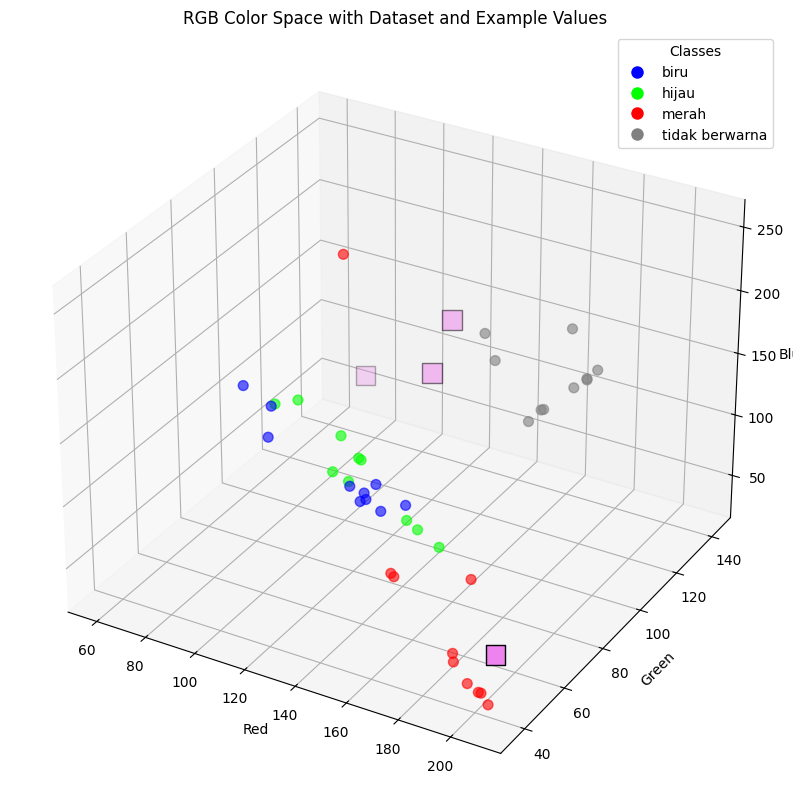

In [24]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the entire dataset
# Get unique classes in the order they are encoded by pandas Categorical
category_names = df['class'].astype('category').cat.categories
class_codes_for_cmap = df['class'].astype('category').cat.codes

# Create a base colormap (e.g., 'viridis') with enough colors for all categories
base_cmap = plt.get_cmap('viridis', len(category_names))
colors_array = base_cmap(np.linspace(0, 1, len(category_names)))

# Find the index of 'tidak berwarna' in the category names and set its color to grey
idx_tidak_berwarna = np.where(category_names == 'tidak berwarna')[0][0]
colors_array[idx_tidak_berwarna] = [0.5, 0.5, 0.5, 1]  # RGBA for grey

# Find the index of 'biru' in the category names and set its color to blue
idx_biru = np.where(category_names == 'biru')[0][0]
colors_array[idx_biru] = [0, 0, 1, 1]  # RGBA for blue

# Find the index of 'hijau' in the category names and set its color to green
idx_hijau = np.where(category_names == 'hijau')[0][0]
colors_array[idx_hijau] = [0, 1, 0, 1]  # RGBA for green

# Find the index of 'merah' in the category names and set its color to red
idx_merah = np.where(category_names == 'merah')[0][0]
colors_array[idx_merah] = [1, 0, 0, 1]  # RGBA for red

# Create a new ListedColormap from the modified colors array
custom_cmap = ListedColormap(colors_array)

# Plot the entire dataset with the custom colormap
scatter = ax.scatter(df['red'], df['green'], df['blue'],
                     c=class_codes_for_cmap, cmap=custom_cmap, s=50, alpha=0.6)

# Plot the example values with square markers
example_r = [ex[0] for ex in examples]
example_g = [ex[1] for ex in examples]
example_b = [ex[2] for ex in examples]
ax.scatter(example_r, example_g, example_b, marker='s', s=200, c='violet', label='Example Values', edgecolors='black', linewidth=1)

# Add labels and title
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('RGB Color Space with Dataset and Example Values')

# Create a custom legend with actual class names and their custom colors
legend_handles = []
for i, cls_name in enumerate(category_names):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=cls_name,
                                     markerfacecolor=custom_cmap(i), markersize=10))

ax.legend(handles=legend_handles, title="Classes")
plt.show()

In [25]:
from scipy.spatial.distance import euclidean

# Input RGB value
input_rgb = np.array([[120, 130, 150]])

# Scale the input RGB value using the same scaler fitted on the training data
input_rgb_scaled = scaler.transform(input_rgb)

# Calculate Euclidean distances to all points in the scaled training dataset
euclidean_distances = []
for i in range(len(X_train_scaled)):
    dist = euclidean(input_rgb_scaled[0], X_train_scaled[i])
    euclidean_distances.append(dist)

print(f"Euclidean distances for input RGB {input_rgb[0]} to each training data point:\n")
# Display the first 10 distances and the total number of distances
print(f"First 10 distances: {euclidean_distances[:10]}")
print(f"Total number of distances calculated: {len(euclidean_distances)}")

# Optionally, find the closest points and their classes (similar to what KNN does)
closest_n_indices = np.argsort(euclidean_distances)[:best_k] # Using best_k from the model
closest_distances = [euclidean_distances[i] for i in closest_n_indices]
closest_classes = [y_train[i] for i in closest_n_indices]

print(f"\nClosest {best_k} points (distances): {closest_distances}")
print(f"Classes of closest {best_k} points: {closest_classes}")


Euclidean distances for input RGB [120 130 150] to each training data point:

First 10 distances: [2.0883133624991936, 2.0175639806563774, 3.8648002843512836, 0.666792795049842, 2.0354021418727926, 2.327324882263382, 0.3283103251555033, 2.032158951553671, 2.192506981106529, 1.3699036796391446]
Total number of distances calculated: 28

Closest 1 points (distances): [0.3283103251555033]
Classes of closest 1 points: ['tidak berwarna']


In [26]:
# Sort the Euclidean distances from nearest to farthest
sorted_distances = sorted(euclidean_distances)

print("Euclidean distances sorted from nearest to farthest:")
print(sorted_distances)

Euclidean distances sorted from nearest to farthest:
[0.3283103251555033, 0.666792795049842, 1.0220795109525487, 1.319282918628397, 1.3380458584413195, 1.3699036796391446, 1.39872790798343, 2.0175639806563774, 2.020047943311299, 2.032158951553671, 2.0354021418727926, 2.0883133624991936, 2.192506981106529, 2.236397266603974, 2.240868450193709, 2.2740668843633602, 2.3025774461068584, 2.327324882263382, 2.378344353802655, 2.539731387019406, 2.6482649908759743, 2.710488858231232, 3.0576654349636017, 3.8648002843512836, 4.2100564456393315, 4.309540532206906, 4.32037987008965, 4.4542459632335625]


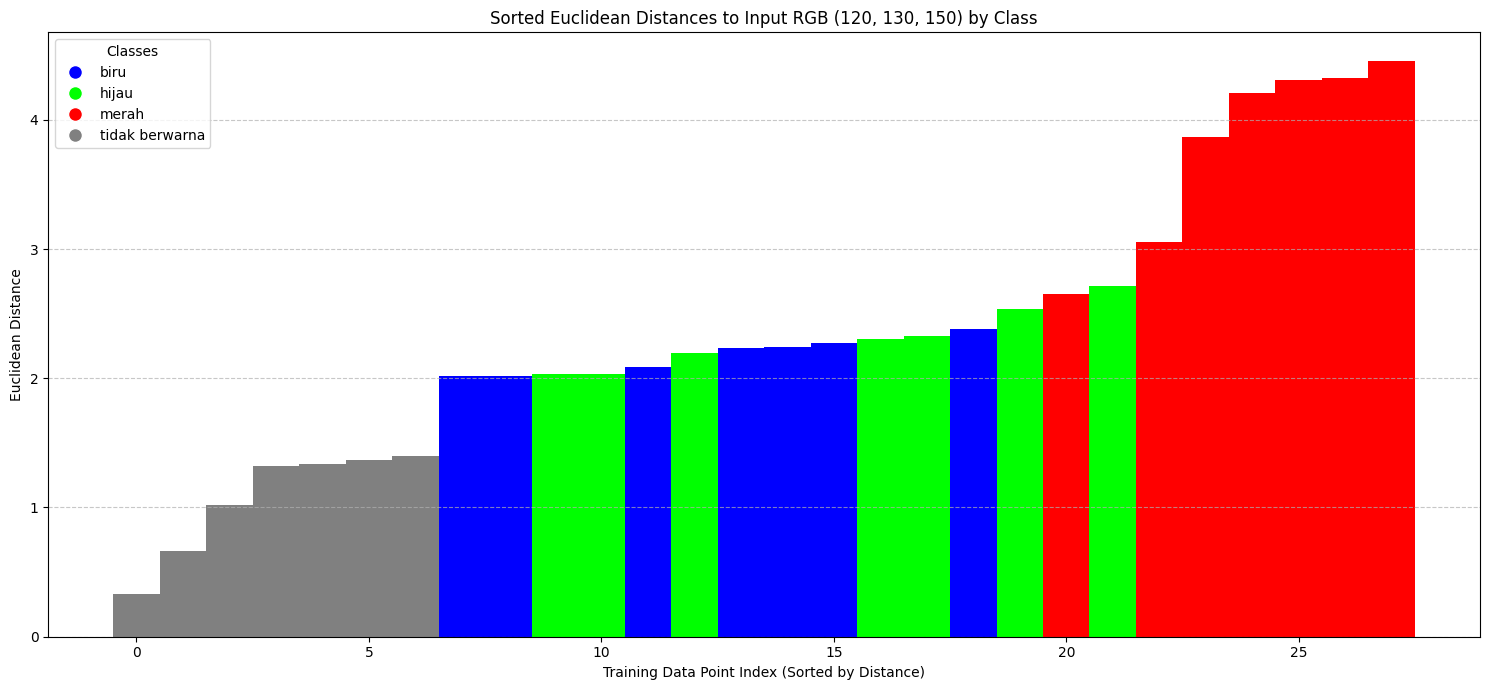

In [27]:
from matplotlib.colors import ListedColormap

# Combine distances with their corresponding classes
distances_with_classes = []
for i in range(len(euclidean_distances)):
    dist = euclidean_distances[i]
    cls = y_train[i]
    dist_with_class = {'distance': dist, 'class': cls}
    distances_with_classes.append(dist_with_class)

# Sort the combined list by distance
sorted_distances_with_classes = sorted(distances_with_classes, key=lambda x: x['distance'])

# Separate sorted distances and classes
sorted_distances = [d['distance'] for d in sorted_distances_with_classes]
sorted_classes = [d['class'] for d in sorted_distances_with_classes]

# Prepare custom colormap (re-using logic from previous cells for consistency)
category_names = df['class'].astype('category').cat.categories

base_cmap = plt.get_cmap('viridis', len(category_names))
colors_array = base_cmap(np.linspace(0, 1, len(category_names)))

idx_tidak_berwarna = np.where(category_names == 'tidak berwarna')[0][0]
colors_array[idx_tidak_berwarna] = [0.5, 0.5, 0.5, 1]  # RGBA for grey

idx_biru = np.where(category_names == 'biru')[0][0]
colors_array[idx_biru] = [0, 0, 1, 1]  # RGBA for blue

idx_hijau = np.where(category_names == 'hijau')[0][0]
colors_array[idx_hijau] = [0, 1, 0, 1]  # RGBA for green

idx_merah = np.where(category_names == 'merah')[0][0]
colors_array[idx_merah] = [1, 0, 0, 1]  # RGBA for red

custom_cmap = ListedColormap(colors_array)

# Map class names to their numerical codes for coloring
class_to_code = {name: code for code, name in enumerate(category_names)}
bar_colors = [custom_cmap(class_to_code[cls]) for cls in sorted_classes]

# Create the bar chart
plt.figure(figsize=(15, 7))
plt.bar(range(len(sorted_distances)), sorted_distances, color=bar_colors, width=1.0)

plt.title('Sorted Euclidean Distances to Input RGB (120, 130, 150) by Class')
plt.xlabel('Training Data Point Index (Sorted by Distance)')
plt.ylabel('Euclidean Distance')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Create a custom legend for the bar chart
legend_handles = []
for i, cls_name in enumerate(category_names):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=cls_name,
                                     markerfacecolor=custom_cmap(i), markersize=10))

plt.legend(handles=legend_handles, title="Classes")

plt.tight_layout()
plt.show()